In [1]:
import keras
from keras.applications import DenseNet121 #DenseNet121, DenseNet169, DenseNet201, ResNet50
from keras.models import Model
from keras.layers import Dense
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
from label_dict import label_dict

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Build the new model based on DenseNet121
def getmodel(num_classes=256):
    '''
    Build the new model based on DenseNet121, DenseNet169, DenseNet201
    
    Argument:
    num_classes -- (int) number of classes
    
    Return:
    model -- the new compiled model
    '''
    
    orig_model = DenseNet121(include_top=False, weights='imagenet', pooling='avg', classes=num_classes)
    densenet_out = orig_model.layers[-1].output
    out = Dense(256, activation='softmax', kernel_initializer='glorot_uniform')(densenet_out)
    model = Model(input=orig_model.input, output=out)
    model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [3]:
model = getmodel(256)

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  app.launch_new_instance()


In [4]:
#Import test dataset
X_test = np.load('test_resize_221.npy')/255.
y_test = np.load('test.npy')[:, 0]

In [5]:
print('The number of test images is: '+str(X_test.shape[0]))

The number of test images is: 5956


In [6]:
model.load_weights('DenseNet121_transfer.hdf5')

In [7]:
pred = model.predict(X_test)
max_prob = np.max(pred, axis=1, keepdims=True)
index = np.where(pred == max_prob)[1]
num_correct_pred = np.count_nonzero(index == y_test)

print('The test accuracy is: %.2f' % (num_correct_pred/float(X_test.shape[0])*100) + '%')

The test accuracy is: 61.37%


In [8]:
eve_class_img = np.zeros((256,1))
acc_class = np.zeros((256,1))

for i in range(y_test.shape[0]):
    eve_class_img[y_test[i]] += 1

for i in range(y_test.shape[0]):
    if index[i] == y_test[i]:
        acc_class[y_test[i]] += 1

acc_per_class = acc_class/eve_class_img

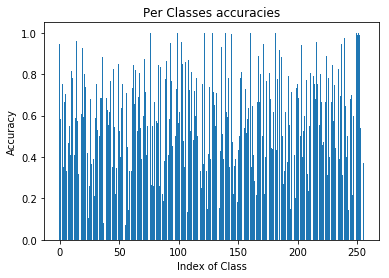

In [9]:
plt.bar(range(acc_per_class.shape[0]), acc_per_class.T[0], align='center')
plt.title('Per Classes accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Index of Class')
#plt.yticks(size = 16)
plt.show()

In [10]:
acc_y = np.zeros((1,10))
for i in range(10):
    acc_y[0, i] = np.where((acc_per_class>(0+i/10.)) & (acc_per_class<=(0.1+i/10.)))[0].shape[0]

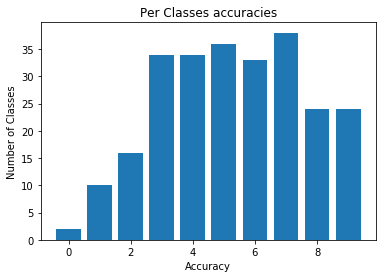

In [11]:
plt.bar(range(acc_y.shape[1]), acc_y[0], align='center')
plt.title('Per Classes accuracies')
plt.ylabel('Number of Classes')
plt.xlabel('Accuracy')
#plt.yticks(size = 16)
plt.show()